In [1]:
import os
os.chdir("../../scVI/")
os.getcwd()

import pickle
import numpy as np
import pandas as pd
from copy import deepcopy
import gseapy as gp

save_path = '../CSF/Notebooks/'

In [3]:
with open(save_path + 'DE/MSinPBMC.DEres.pkl', 'rb') as f:
    PBMC_DE,PBMC_DEclust = pickle.load(f)

In [4]:
with open(save_path + 'DE/MSinCSF.DEres.pkl', 'rb') as f:
    CSF_DE,CSF_DEclust = pickle.load(f)

In [5]:
PBMC_DEclust

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21]

In [6]:
CSF_DEclust

[2, 3, 4, 5, 6, 9, 10, 11, 13, 14, 17, 18, 19, 20]

In [36]:
matched = []
clustid = []
for i,x in enumerate(PBMC_DEclust):
    if x in CSF_DEclust:
        j = [k for k,y in enumerate(CSF_DEclust) if y==x][0]
        temp = PBMC_DE[i].loc[CSF_DE[j].index]
        temp = pd.concat([temp['bayes1'],CSF_DE[j]['bayes1']],axis=1)
        temp.columns = ['PBMC_bayes','CSF_bayes']
        matched.append(temp)
        clustid.append(x)
        

In [41]:
celllabels = np.load(save_path+'meta/celllabels.npy')
celltypes = np.unique(celllabels)
celltypes[clustid]

array(['B2', 'CD4', 'CD8a', 'CD8n', 'Gran', 'Mono Doublet', 'NK1', 'NK2',
       'Tdg', 'Tregs', 'mDC2', 'ncMono', 'pDC'], dtype=object)

In [17]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt


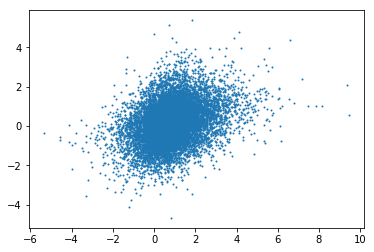

In [56]:
plt.scatter(x=list(matched[12]['PBMC_bayes']),y=list(matched[12]['CSF_bayes']),s=1)